In [1]:
from jupyter_utils import jupyter_setup
jupyter_setup()
import numpy as np
import matplotlib.pyplot as plt
import torch

C:\Michi\acoustic_covid_detection\python


# Apply a random transfer function to (Mel-)spectrogram data
online data augmentation technique. constant factor applied to each frequency bin over all time steps. <br>
Not purely random but it consists of several sinusoids (wavelength = spectrum/2, spectrum/4,...). The coefficients of all sinusoids are random but specified in their max magnitude. This means that from one frequency bin to the next it is always "stetig" and does not jump around randomly<br>


<div>
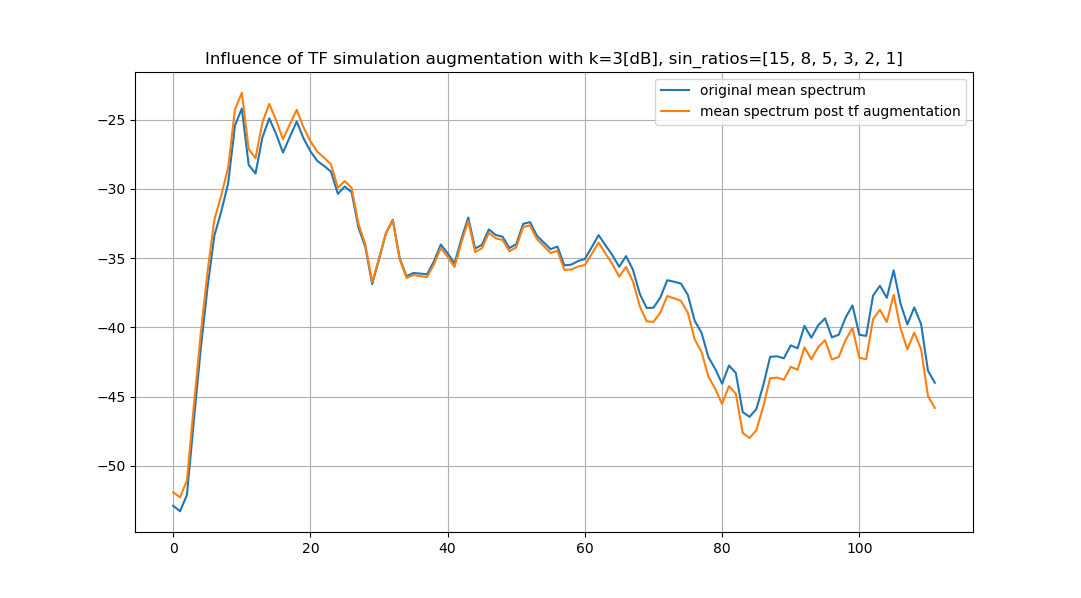
</div>


In [2]:
class TransferFunctionSim:
    def __init__(self, k=0.1, sinusoid_ratios=[15, 8, 5, 3, 2, 1]):
        self.k = k
        self.sinusoid_ratios = sinusoid_ratios

    def __call__(self, tensor):
        # F = tensor.shape[-2]

        if isinstance(tensor, np.ndarray):
            # tensor = torch.Tensor(tensor)
            return tensor + self.get_tf(tensor)
        else:
            # tensor = np.array(tensor)
            return tensor + torch.Tensor(self.get_tf(np.array(tensor)))

    def __repr__(self):
        return self.__class__.__name__ + f"k={self.k}, sin_ratios={self.sinusoid_ratios}"
    
    def get_tf(self, tensor):
        n_freq_bins = tensor.shape[-2]
        
        n_sinosoids = len(self.sinusoid_ratios)
        sinosoid_ratios = np.expand_dims(np.array(self.sinusoid_ratios), 1).astype("float")
        sinosoid_ratios /= sinosoid_ratios.sum()
        sinosoid_coefs = sinosoid_ratios * self.k

        freq_multiplicator = np.expand_dims(np.arange(n_sinosoids) + 1, 1)

        argument = np.tile(np.arange(n_freq_bins) / n_freq_bins / 2, (n_sinosoids, 1)).astype("float")
        argument *= freq_multiplicator
        argument += np.random.uniform(size=(n_sinosoids, 1))
        tf = np.sin(2 * np.pi * argument)
        tf *= sinosoid_coefs
        tf = tf.sum(axis=0)
        return np.expand_dims(tf, axis=1)

In [73]:
tf = TransferFunctionSim(k=3, sinusoid_ratios=[15, 8, 5, 3, 2, 1])

(Text(0.5, 0, 'Mel Bin'), Text(0, 0.5, 'Gain [dB]'), None)

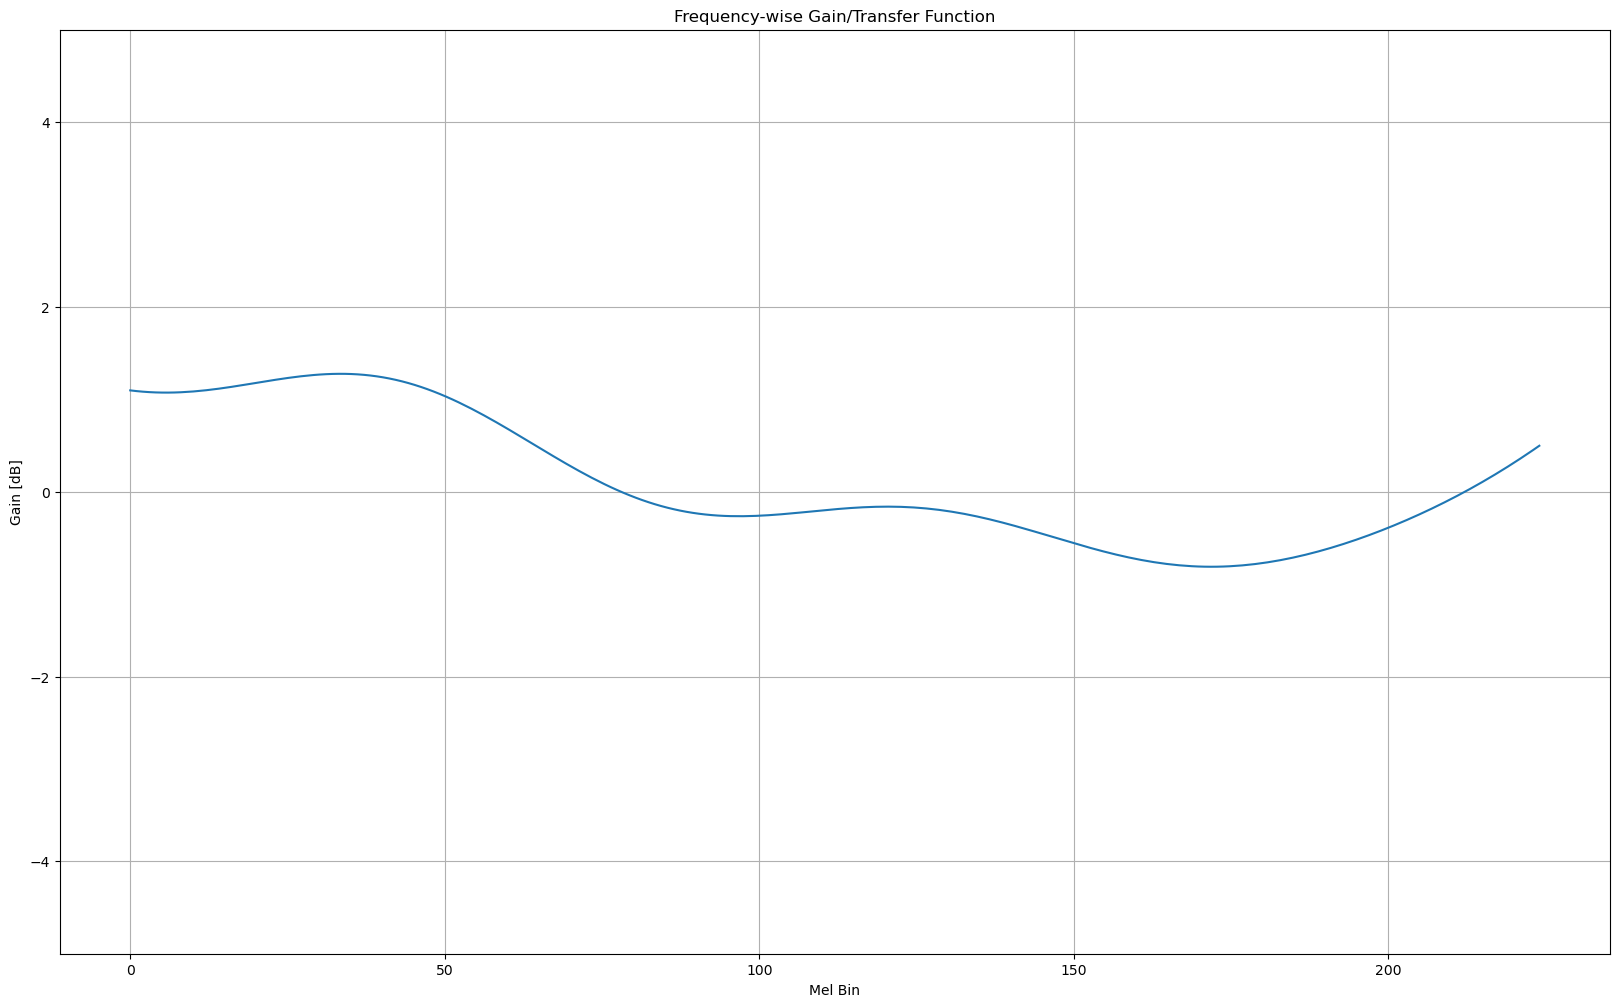

In [131]:
plt.figure(figsize=(20, 12))  # Adjust the width and height as needed
plt.plot(np.linspace(0,224, 224), 1+tf.get_tf(torch.ones(224, 20))), 
plt.ylim([-5, 5]), 
plt.title("Frequency-wise Gain/Transfer Function"),
plt.xlabel("Mel Bin"), plt.ylabel("Gain [dB]"), plt.grid()

In [39]:
sample = torch.ones(10, 20) + 0.01*torch.rand(10, 20)

Text(0.5, 1.0, 'Magnitude over time of several Frequency Bins before applying tf')

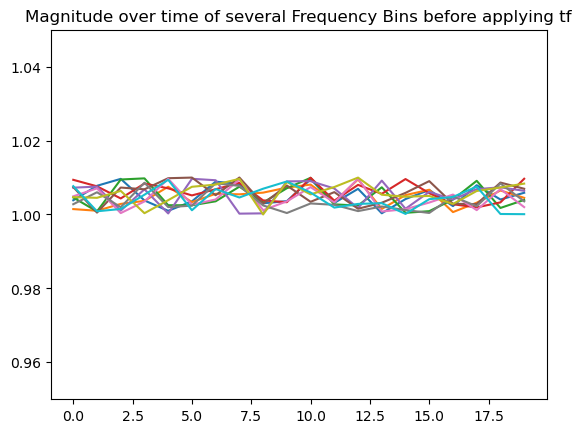

In [55]:
_ = plt.plot(sample.transpose(0,1)), plt.ylim([0.95, 1.05]), 
plt.title("Magnitude over time of several Frequency Bins before applying tf")

Text(0.5, 1.0, 'Magnitude over time of several Frequency Bins after applying tf')

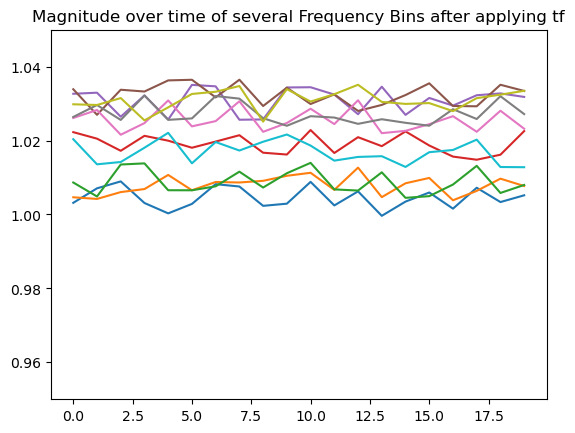

In [56]:
_ = plt.plot(tf(sample).transpose(0,1)), plt.ylim([0.95, 1.05])
plt.title("Magnitude over time of several Frequency Bins after applying tf")